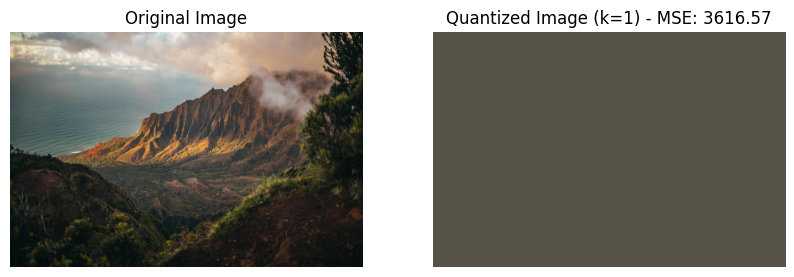

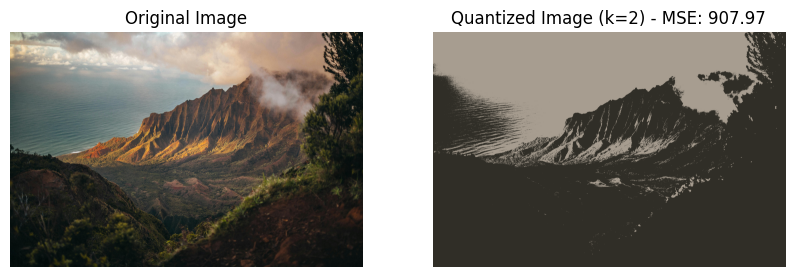

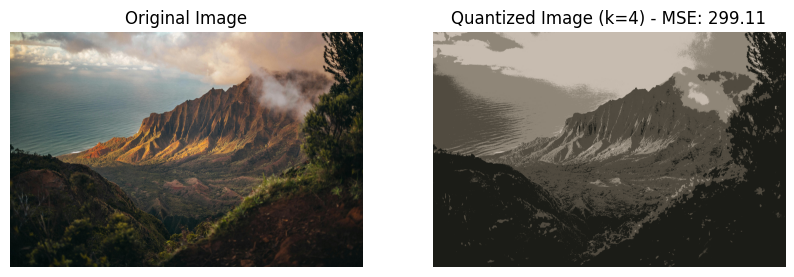

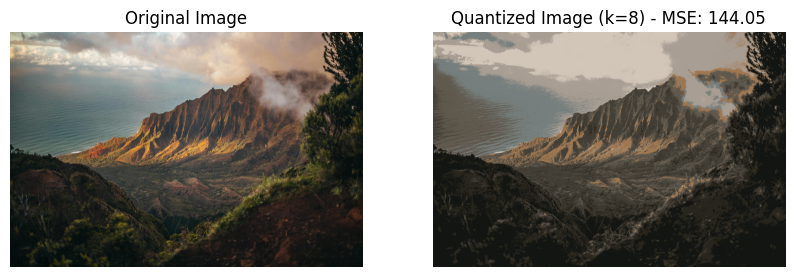

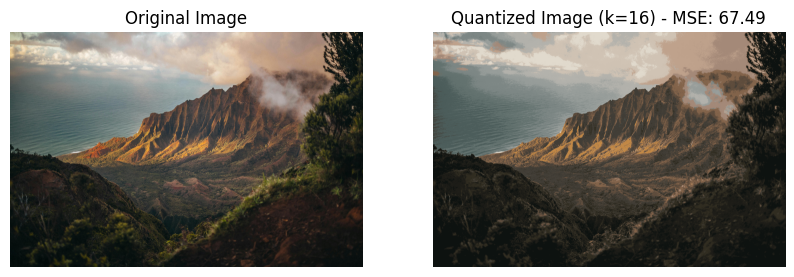

Effectiveness and Limitations Analysis:
k=1, MSE=3616.57
k=2, MSE=907.97
k=4, MSE=299.11
k=8, MSE=144.05
k=16, MSE=67.49

Discussion:
As the value of k increases, the MSE between the original and quantized images generally decreases,
indicating that the quantized image becomes more similar to the original image.
However, increasing k also increases the computational cost and may lead to diminishing returns.
In cases with too low a k value, the image may lose significant detail, resulting in a higher MSE.
Thus, k-Means image quantization is effective at reducing the number of colors in an image, but
the choice of k is crucial in balancing image quality and computational efficiency.


In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


def kmeans_quantization(image, k):
    """
    Apply k-Means quantization to an image.

    Parameters:
    - image: Original image as a NumPy array.
    - k: Number of clusters for k-Means.

    Returns:
    - quantized_image: Quantized image.
    """
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply k-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Create the quantized image
    quantized_image = centers[labels].reshape(image.shape)

    return quantized_image


def calculate_mse(original_image, quantized_image):
    """
    Calculate the Mean Squared Error (MSE) between the original and quantized images.

    Parameters:
    - original_image: Original image as a NumPy array.
    - quantized_image: Quantized image.

    Returns:
    - mse: Mean Squared Error.
    """
    # Flatten the images to 2D arrays
    original_flat = original_image.reshape(-1, 3)
    quantized_flat = quantized_image.reshape(-1, 3)

    mse = mean_squared_error(original_flat, quantized_flat)
    return mse


def main():
    # Read the RGB image as input
    # Replace with your image path
    image_path = 'C:\\Users\\mites\\OneDrive\\Desktop\\CV_Assignment 1- database\\Assignment 1 database\\Q1\\RGB image 1.jpg'
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Varying k values for k-Means
    k_values = [1, 2, 4, 8, 16]

    # Store MSE values for analysis
    mse_values = []

    # Perform k-Means quantization for each k value
    for k in k_values:
        quantized_image = kmeans_quantization(original_image, k)
        mse = calculate_mse(original_image, quantized_image)
        mse_values.append(mse)

        # Display the original and quantized images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(quantized_image)
        plt.title(f'Quantized Image (k={k}) - MSE: {mse:.2f}')
        plt.axis('off')

        plt.show()

    # Analysis of the effectiveness and limitations of k-Means image quantization
    print("Effectiveness and Limitations Analysis:")
    for i, k in enumerate(k_values):
        print(f"k={k}, MSE={mse_values[i]:.2f}")

    print("\nDiscussion:")
    print("As the value of k increases, the MSE between the original and quantized images generally decreases,")
    print("indicating that the quantized image becomes more similar to the original image.")
    print("However, increasing k also increases the computational cost and may lead to diminishing returns.")
    print("In cases with too low a k value, the image may lose significant detail, resulting in a higher MSE.")
    print("Thus, k-Means image quantization is effective at reducing the number of colors in an image, but")
    print("the choice of k is crucial in balancing image quality and computational efficiency.")


if __name__ == "__main__":
    main()


Number of connected components (excluding background): 45


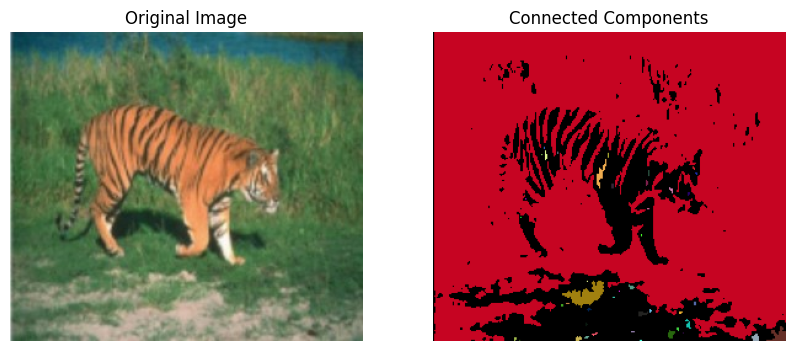

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_connected_components(image_path):
    # Read the image from file
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding (we can adjust the threshold for better segmentation)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)

    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Output the number of connected components
    print(f"Number of connected components (excluding background): {num_labels - 1}")

    # Create an output image to visualize components
    output_image = np.zeros_like(image)

    # Assign random colors to each component for visualization
    for i in range(1, num_labels):  # Skip the background component (label 0)
        mask = labels == i
        output_image[mask] = np.random.randint(0, 255, 3)  # Assign random colors

    # Display the original and labeled images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Connected Components')
    plt.axis('off')

    plt.show()

# Path to the uploaded image file
image_path = 'C:\\Users\\mites\\OneDrive\\Desktop\\CV_Assignment 1- database\\Assignment 1 database\\Q2\\tiger.jpg'  # Change this to the correct path

# Run the connected components detection
find_connected_components(image_path)


Reduced image saved at C:\Users\mites\OneDrive\Desktop\CV_Assignment 1- database\Assignment 1 database\Q3\reduce_lena_256.tif
PSNR value between images: 31.06 dB
Mean Squared Error (MSE) between images: 22.17


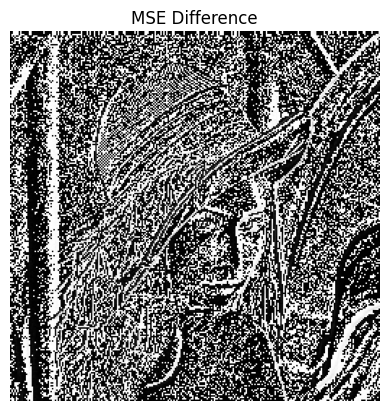

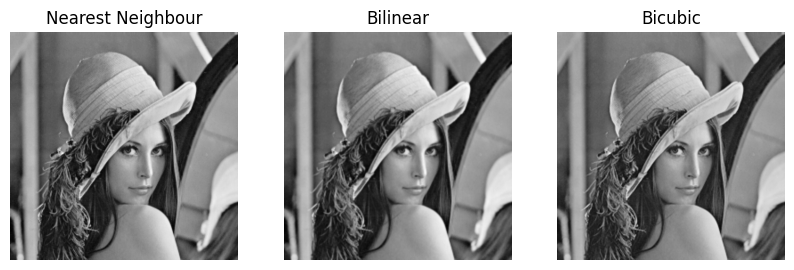

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr


image_path = r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 1- database\Assignment 1 database\Q3\lena_gray_512.tif'
reduce_lena_256_path = r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 1- database\Assignment 1 database\Q3\reduce_lena_256.tif'
given_lena_256_path = r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 1- database\Assignment 1 database\Q3\lena_gray_256.tif'

# (a) Reduce the image size by downsampling to 256x256 and save it as 'reduce_lena_256.tif'
def downsample_image(image_path, save_path, size=(256, 256)):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    reduced_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
    
    cv2.imwrite(save_path, reduced_image)
    print(f"Reduced image saved at {save_path}")
    return reduced_image

# (b) Compare the reduced image with the given image and calculate PSNR, MSE difference
def compare_images(image1, image2):
    # Compute the PSNR value
    psnr_value = psnr(image1, image2)
    print(f"PSNR value between images: {psnr_value:.2f} dB")

    # Compute Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)
    print(f"Mean Squared Error (MSE) between images: {mse:.2f}")

    # Plot the MSE difference
    difference = np.abs(image1 - image2)
    plt.imshow(difference, cmap='gray')
    plt.title('MSE Difference')
    plt.axis('off')
    plt.show()

# (c) Resize the reduced image back to original size using three interpolation methods
def resize_image(image, original_size=(512, 512)):
    # Nearest Neighbour Interpolation
    nearest = cv2.resize(image, original_size, interpolation=cv2.INTER_NEAREST)

    # Bilinear Interpolation
    bilinear = cv2.resize(image, original_size, interpolation=cv2.INTER_LINEAR)

    # Bicubic Interpolation
    bicubic = cv2.resize(image, original_size, interpolation=cv2.INTER_CUBIC)

    # Display the results
    titles = ['Nearest Neighbour', 'Bilinear', 'Bicubic']
    images = [nearest, bilinear, bicubic]

    plt.figure(figsize=(10, 7))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    return nearest, bilinear, bicubic

# Main execution flow
if __name__ == "__main__":
    # Step (a) Downsample the image to 256x256
    reduced_lena = downsample_image(image_path, reduce_lena_256_path)

    # Load the given 256x256 image from the database
    given_lena_256 = cv2.imread(given_lena_256_path, cv2.IMREAD_GRAYSCALE)

    # Step (b) Compare the reduced image with the given 256x256 image and calculate PSNR
    compare_images(reduced_lena, given_lena_256)

    # Step (c) Resize the reduced image back to 512x512 using different interpolation methods
    nearest, bilinear, bicubic = resize_image(reduced_lena)
